Data before Transformation
      day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI       result  

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

Confusion Matrix
 [[ 0  1  0]
 [ 0 10  1]
 [ 0  3 22]]
Classification Report
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.71      0.91      0.80        11
         5.0       0.96      0.88      0.92        25

    accuracy                           0.86        37
   macro avg       0.56      0.60      0.57        37
weighted avg       0.86      0.86      0.86        37

Coefficients
 [array([[ 1.85202920e-01, -2.35476034e-02,  9.26713411e-01],
       [ 5.87288150e-02, -1.07595402e+00, -2.46494270e-01],
       [-1.39359746e-05, -1.48986425e-04,  2.99195192e-05],
       [ 1.73394136e-01,  4.11417934e-01,  1.06284828e+00],
       [-3.80273919e-01, -1.00057753e+00, -2.73327505e-01],
       [ 3.25486108e-01, -6.76080126e-01,  6.47976031e-01],
       [ 8.17155824e-01, -1.22070993e+00, -1.43326690e+00],
       [-1.49563411e+00,  1.38353151e+00, -1.43261657e+00],
       [-6.99794071e-01, -7.43569619e-01, -7.0

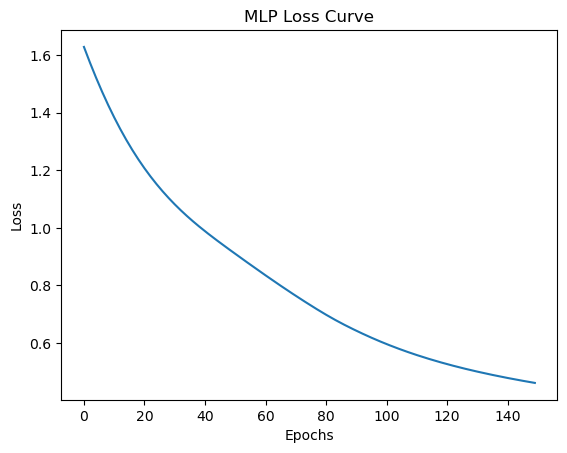

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'ds.csv'
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()
print('Data before Transformation\n', data)

le = LabelEncoder()
data['result'] = le.fit_transform(data['result'])

print('Data after Transformation\n', data.replace({1: 'fire', 0: 'not fire'}))

for col in data.columns[:-1]:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)
print('Data before Scaling\n', data)


inplist = data.columns[:-1]
scale = StandardScaler()
data[inplist] = scale.fit_transform(data[inplist])

print('Data after Scaling\n', data)

x = data.values[:, :-1]
y = data.values[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

clf = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', max_iter=150, solver='adam', 
                    learning_rate='constant', learning_rate_init=0.01, random_state=42)
clf.fit(x_train, y_train)

ypred = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred)

print('Confusion Matrix\n', cm)
print('Classification Report\n', classification_report(y_test, ypred))
print('Coefficients\n', clf.coefs_)
print('Intercepts\n', clf.intercepts_)

plt.plot(clf.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Loss Curve')
plt.show()
